## Combining All

In [20]:
cityname = 'Raipur'

lst = [
    'final-output/Raipur-final-mst-minibatch-k-means-clustering.csv',
    'final-output/Raipur-final-mst-k-means-clustering.csv',
    'final-output/Raipur-final-mst-bisecting-k-means-clustering.csv'
]

methods = [
    "MiniBatch K Means Clustering",
    "K Means Clustering",
    "Bisecting K Means Clustering"
]

colors = [
    'red', # minibatch-k-means-clustering
    'green', # k-means-clustering
    'purple' # bisecting-k-means-clustering
]

In [21]:
import pandas as pd

df_lst = []
for i in lst:
    df_lst.append(pd.read_csv(i))

In [22]:
from mst_utils import get_mutiple_mst
import folium
map_ = get_mutiple_mst(cityname, df_lst, colors)

red metro network is of length: 81.82844502246489
green metro network is of length: 83.35445416505686
purple metro network is of length: 79.97318733668847


In [23]:
from folium.plugins import FloatImage
import base64

legend_img = 'assets/legend-dkmc.png'


with open(legend_img, 'rb') as lf:
  # open in binary mode, read bytes, encode, decode obtained bytes as utf-8 string
  b64_content = base64.b64encode(lf.read()).decode('utf-8')

FloatImage('data:image/png;base64,{}'.format(b64_content), bottom=0, left=0).add_to(map_)

In [24]:
map_.save(f'final-output/comparison-all-kmeans-mst.html')
map_

In [25]:
for i in range(len(df_lst)):
    from mst_utils import get_edge_list
    try:
        df_lst[i]['Area (km^2)'] = df_lst[i]['Area (km)']
        df_lst[i].drop(['Area (km)'], axis = 1, inplace = True)
    except:
        pass

    df = df_lst[i]
    filename = lst[i]

    data_dict = get_edge_list(df)

    df.drop(columns = ["Unnamed: 0"], inplace = True)
    
    degree = dict()
    for station_name_1, station_name_2 in data_dict['included_edges']:
        if not (station_name_1 in degree):
            degree[station_name_1] = 0
        if not (station_name_2 in degree):
            degree[station_name_2] = 0
        
        degree[station_name_1] += 1
        degree[station_name_2] += 1
    
    df['Degree'] = df['Station Name'].map(degree)
    
    df.to_csv(filename)    

## Plots

In [26]:
df_lst[0].head()

,Cluster,Population,Cluster Distance,Latitude,Longitude,Station Name,Degree,Area (km^2)
0,0,108833,4.781169,21.245139,81.584068,1,2,26.74
1,1,6024,0.000000,21.200522,81.740279,2,2,2.95
2,2,83442,3.514680,21.220169,81.647447,3,4,8.45
3,3,10785,3.110471,21.293952,81.739268,4,2,17.98
4,4,40524,10.422050,21.139769,81.787203,5,1,19.47


In [27]:
df_lst[1].head()

,Cluster,Population,Cluster Distance,Latitude,Longitude,Station Name,Degree,Area (km^2)
0,0,93312,6.761400,21.254577,81.642435,1,3,16.09
1,1,5522,4.500982,21.200726,81.788958,2,1,16.38
2,2,53553,2.415139,21.253958,81.565932,3,1,15.24
3,3,14504,3.281430,21.132758,81.739280,4,1,40.54
4,4,10785,3.110471,21.307911,81.740205,5,2,17.98


In [ ]:
df_lst[2].head()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

City: Raipur


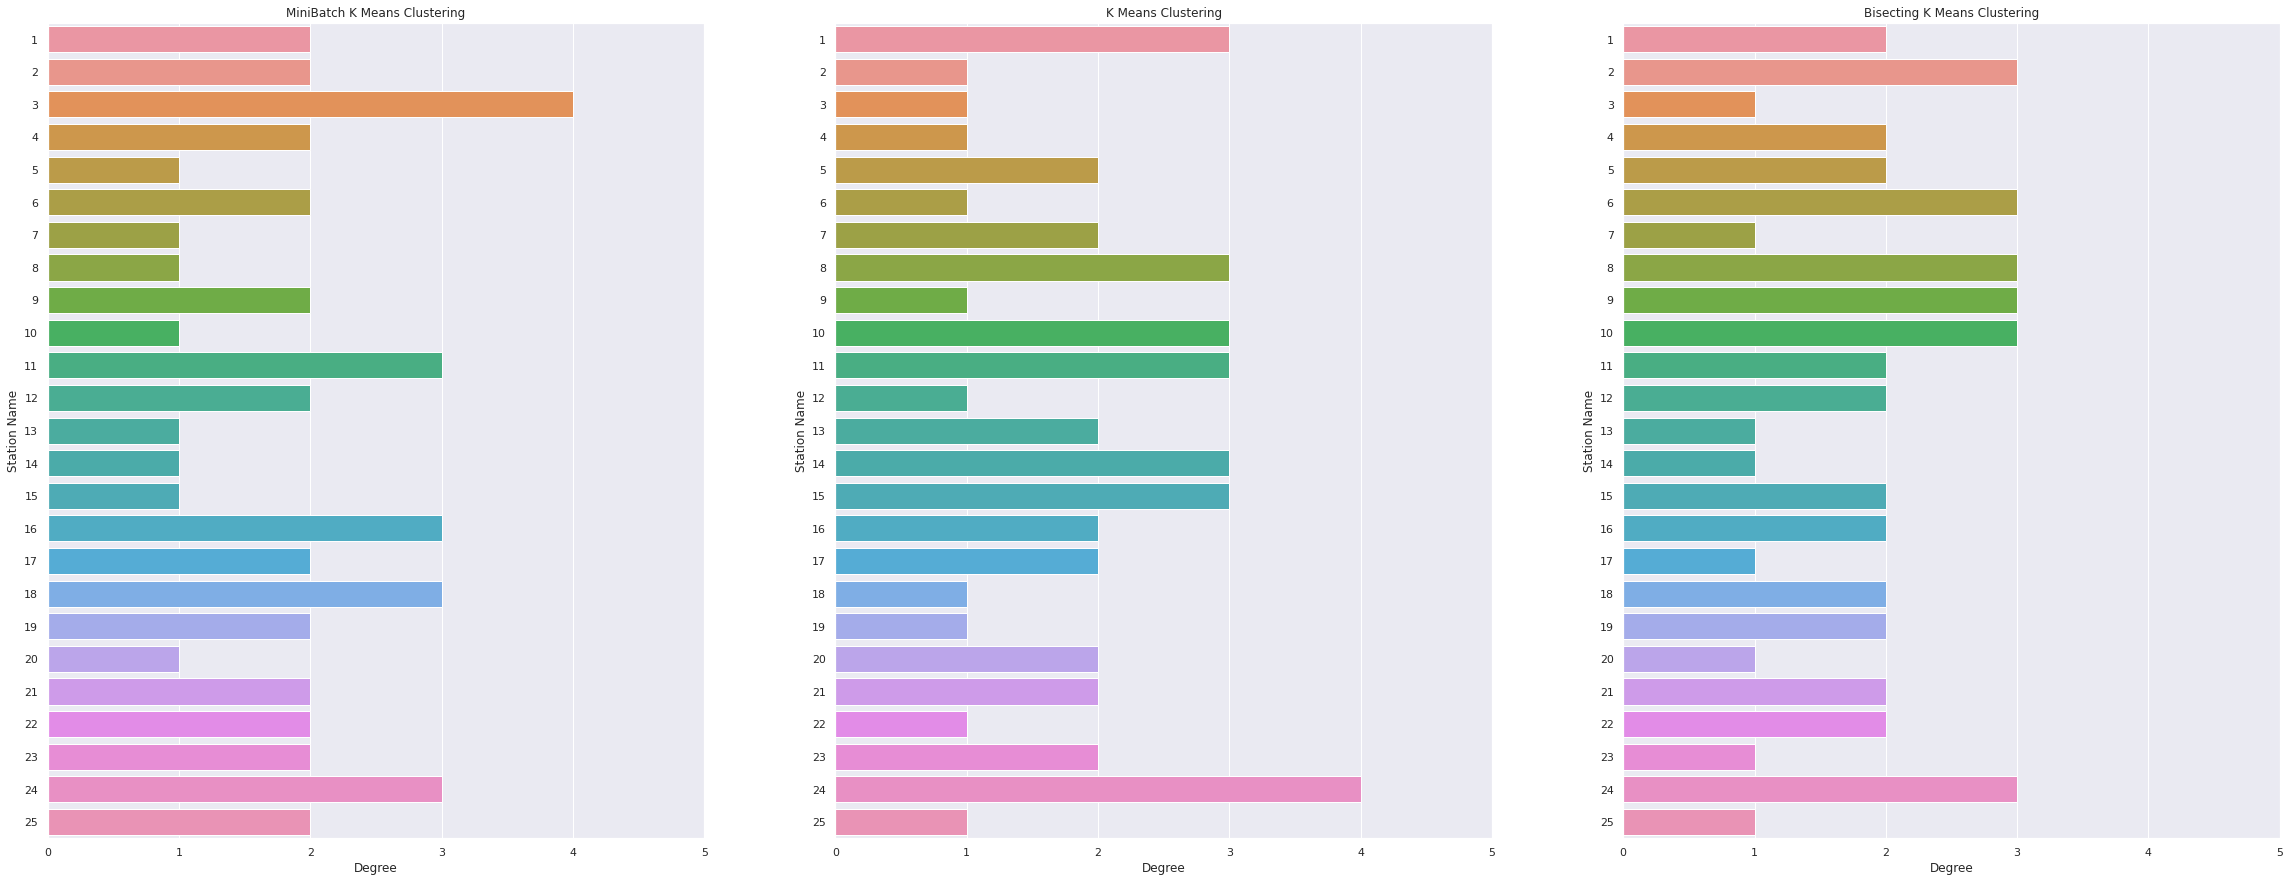

In [29]:
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(20, 10)})
print(f"City: Raipur")
for tq in range(3):
    sns.barplot(data = df_lst[tq], y = 'Station Name', x = 'Degree', orient='h', ax = ax[tq])
    ax[tq].set(title = f'{methods[tq]}')
    ax[tq].set_xlim(0, 5)
    

City: Raipur


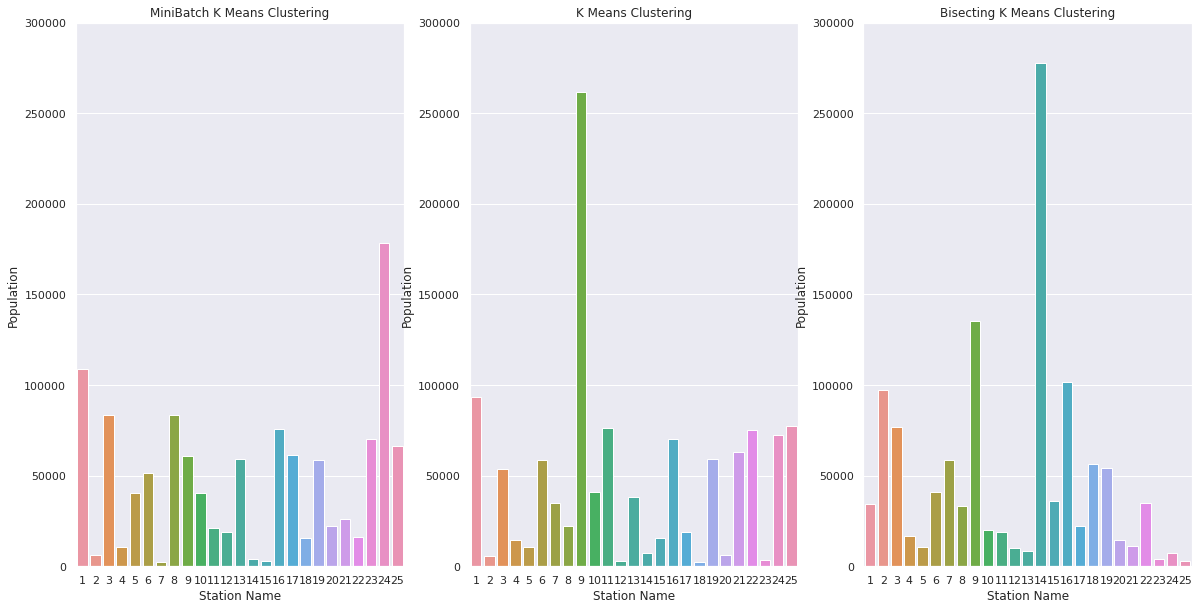

In [30]:
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(40, 15)})
print(f"City: Raipur")
for tq in range(3):
    ax[tq].set(ylim = (0, 300000))
    sns.barplot(data = df_lst[tq], x = 'Station Name', y = 'Population', orient='v', ax = ax[tq])
    ax[tq].set(title = f'{methods[tq]}')

City: Raipur


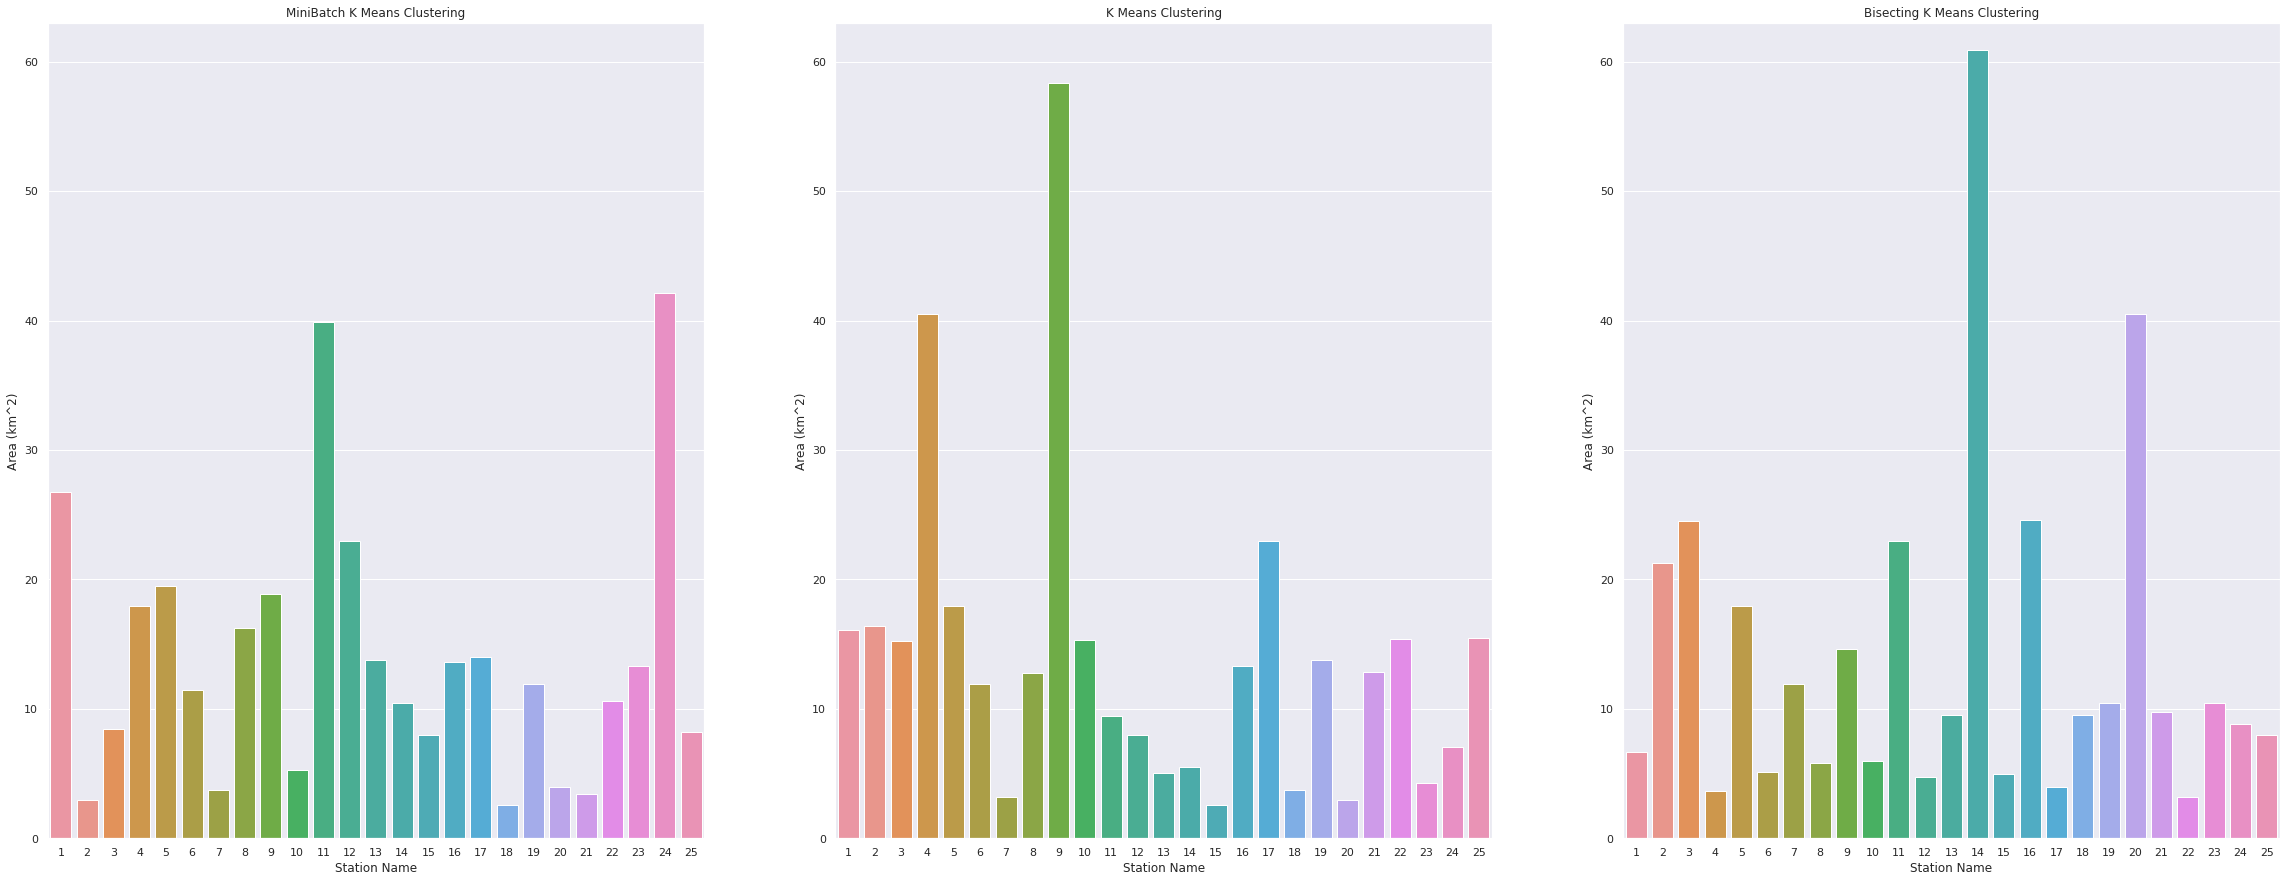

In [31]:
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(40, 15)})
print(f"City: Raipur")
for tq in range(3):
    ax[tq].set(ylim = (0, 63))
    sns.barplot(data = df_lst[tq], x = 'Station Name', y = 'Area (km^2)', orient='v', ax = ax[tq])
    ax[tq].set(title = f'{methods[tq]}')